In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = '/Users/raghav/Documents/Year 3 classes/Fall/DS Fundamentals/Individual Project/data/clashroyale.csv'
df = pd.read_csv(file_path)
df.head()



,Card,Card Level (Spawn Level),Cost,Count,Crown Tower Damage,Damage,Damage per second,Death Damage,Health (+Shield),Hit Speed,...,Maximum Spawned,Radius,Range,Spawn DPS,Spawn Damage,Spawn Health,Spawn Speed,Spawner Health,Troop Spawned,Type
0,Archers,NaN,3.0,2,NaN,86,71,0.0,254,1.2,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
1,Baby Dragon,NaN,4.0,1,NaN,133,83,0.0,"1,064",1.6,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
2,Balloon,NaN,5.0,1,NaN,798,266,272.0,"1,396",3,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
3,Bandit,NaN,3.0,1,NaN,160,160,0.0,780,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses
4,Barbarians,NaN,5.0,4,NaN,159,106,0.0,636,1.5,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Troops and Defenses


In [2]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

num_cols = df.select_dtypes(include= ['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(0)

df.head()

,card,card_level_(spawn_level),cost,count,crown_tower_damage,damage,damage_per_second,death_damage,health_(+shield),hit_speed,...,maximum_spawned,radius,range,spawn_dps,spawn_damage,spawn_health,spawn_speed,spawner_health,troop_spawned,type
0,Archers,NaN,3.0,2,0.0,86,71,0.0,254,1.2,...,0.0,0.0,5,0.0,0.0,0.0,0.0,NaN,NaN,Troops and Defenses
1,Baby Dragon,NaN,4.0,1,0.0,133,83,0.0,"1,064",1.6,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,NaN,NaN,Troops and Defenses
2,Balloon,NaN,5.0,1,0.0,798,266,272.0,"1,396",3,...,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,Troops and Defenses
3,Bandit,NaN,3.0,1,0.0,160,160,0.0,780,1,...,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,Troops and Defenses
4,Barbarians,NaN,5.0,4,0.0,159,106,0.0,636,1.5,...,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,Troops and Defenses


In [3]:
import random

numeric_cols = ["damage", "damage_per_second", "health_(+shield)"]

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(",", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["cost"] = pd.to_numeric(df["cost"], errors="coerce")



def generate_random_deck(df, n_decks=800):
    decks = []

    for _ in range(n_decks):
        deck_cards = df.sample(8, replace=False)

        deck = {
            "avg_elixir": deck_cards["cost"].mean(),
            "total_damage": deck_cards["damage"].sum(),
            "total_dps": deck_cards["damage_per_second"].sum(),
            "total_health": deck_cards["health_(+shield)"].sum(),
            "num_spells": deck_cards["type"].str.contains("Spell").sum(),
            "num_buildings": deck_cards["type"].str.contains("Building").sum(),
            "num_troops": deck_cards["type"].str.contains("Troop").sum(),
        }

        # probabilistic win logic (THE FIX)
        prob = (
            0.50
            + (4 - deck["avg_elixir"]) * 0.12
            + (deck["num_troops"] - 4) * 0.05
            - (deck["num_spells"] * 0.04)
        )

        prob = max(0, min(1, prob))
        deck["win"] = int(np.random.rand() < prob)

        decks.append(deck)

    return pd.DataFrame(decks)

deck_df = generate_random_deck(df)
deck_df.head()


deck_df = generate_random_deck(df)
deck_df.head()




,avg_elixir,total_damage,total_dps,total_health,num_spells,num_buildings,num_troops,win
0,4.125,2312.0,1075.0,11227.0,1,0,7,1
1,4.375,2629.0,437.0,3204.0,2,0,6,1
2,4.125,866.0,562.0,9724.0,0,0,8,0
3,3.750,1930.0,939.0,4047.0,2,0,6,0
4,3.125,1490.0,615.0,3483.0,2,0,6,0


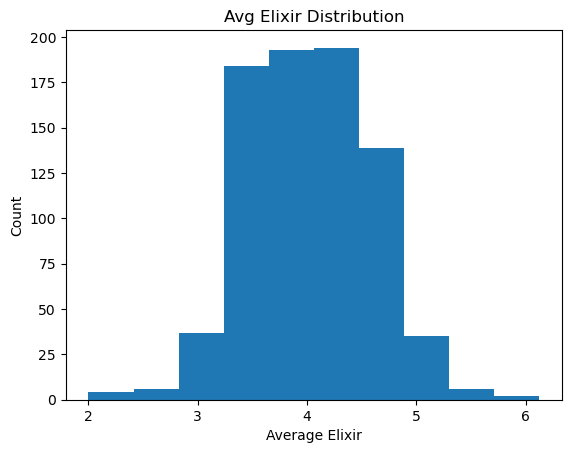

In [4]:
import matplotlib.pyplot as plt

plt.hist(deck_df["avg_elixir"])
plt.xlabel("Average Elixir")
plt.ylabel("Count")
plt.title("Avg Elixir Distribution")
plt.show()


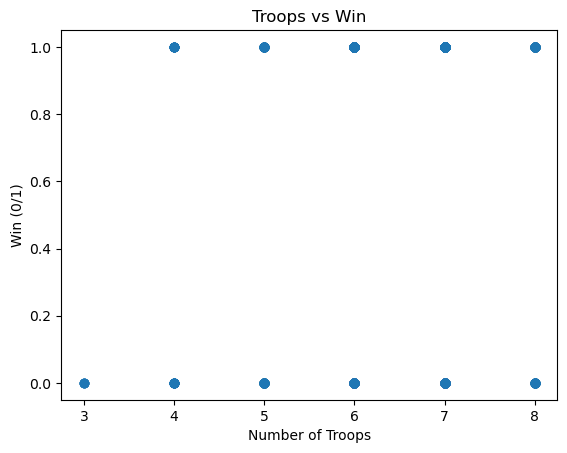

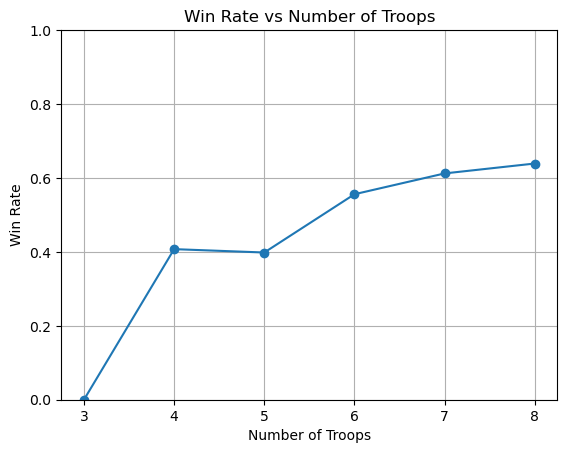

In [5]:
plt.scatter(deck_df["num_troops"], deck_df["win"])
plt.xlabel("Number of Troops")
plt.ylabel("Win (0/1)")
plt.title("Troops vs Win")
plt.show()


# Win rate vs number of troops (cleaner than raw scatter)
win_rate = deck_df.groupby("num_troops")["win"].mean()

plt.plot(win_rate.index, win_rate.values, marker='o')
plt.xlabel("Number of Troops")
plt.ylabel("Win Rate")
plt.title("Win Rate vs Number of Troops")
plt.ylim(0, 1)
plt.grid(True)
plt.show()



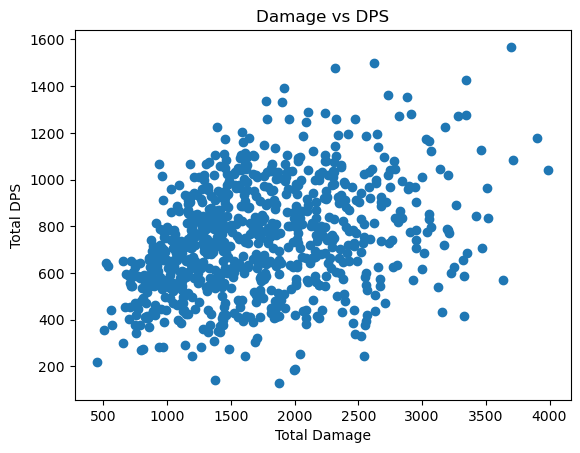

In [6]:
plt.scatter(deck_df["total_damage"], deck_df["total_dps"])
plt.xlabel("Total Damage")
plt.ylabel("Total DPS")
plt.title("Damage vs DPS")
plt.show()


In [7]:
# training a simple logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = deck_df[[
    "avg_elixir",
    "total_damage",
    "total_dps",
    "total_health",
    "num_spells",
    "num_buildings",
    "num_troops"
]]

y = deck_df["win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5875
Confusion Matrix:
[[24 45]
 [21 70]]


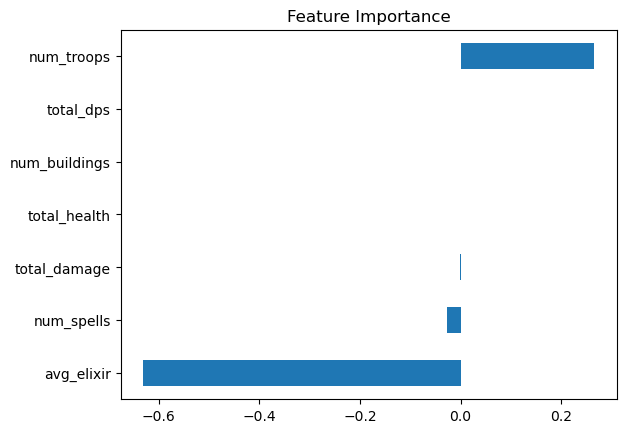

In [8]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind="barh", title="Feature Importance")
plt.show()


Overall, the analysis shows that deck structure actually lines up with how Clash Royale feels in practice. Lower-elixir decks generally have a better chance of winning, and decks built around more troop cards tend to perform better than ones overloaded with spells or buildings. The logistic regression model backed that up: average elixir was the strongest predictor, with troop-heavy decks also getting a noticeable boost. The model isn’t perfect, but it captures the main patterns and gives a solid starting point for understanding what makes a deck strong in this dataset.